## Importing Libraries

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing Dataset

In [48]:
dataset = load_breast_cancer()

## Data Preprocessing

In [49]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [50]:
df = pd.DataFrame(dataset.data, columns = dataset['feature_names'])

In [51]:
df['target'] = dataset['target']

In [52]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [53]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

<BarContainer object of 2 artists>

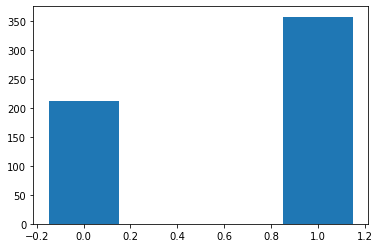

In [54]:
plt.bar(x = df.target.value_counts().index, height = df.target.value_counts(), width = 0.3)

<AxesSubplot:>

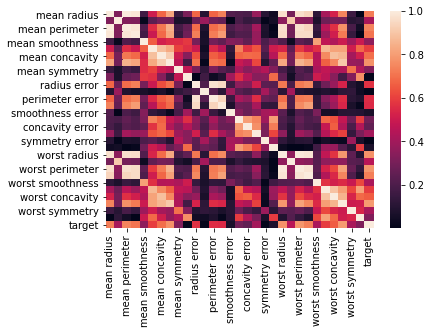

In [55]:
sb.heatmap(df.corr().abs())

In [56]:
df.corr()['target'].abs().sort_values(ascending = False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [57]:
df.corr().target[df.corr()['target'].abs() > 0.7].abs()

mean radius             0.730029
mean perimeter          0.742636
mean area               0.708984
mean concave points     0.776614
worst radius            0.776454
worst perimeter         0.782914
worst area              0.733825
worst concave points    0.793566
target                  1.000000
Name: target, dtype: float64

In [58]:
features = df[['mean radius', 'mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']]

In [59]:
features

,mean radius,mean perimeter,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,17.99,122.80,0.14710,25.380,184.60,2019.0,0.2654
1,20.57,132.90,0.07017,24.990,158.80,1956.0,0.1860
2,19.69,130.00,0.12790,23.570,152.50,1709.0,0.2430
3,11.42,77.58,0.10520,14.910,98.87,567.7,0.2575
4,20.29,135.10,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...
564,21.56,142.00,0.13890,25.450,166.10,2027.0,0.2216
565,20.13,131.20,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,0.15200,25.740,184.60,1821.0,0.2650


In [60]:
#scaled features = > Mean Normalization
scaled_features = pd.DataFrame()
for feature in features:
    scaled_features[feature] = (features[feature] - features[feature].mean()) / ( features[feature].max() -  features[feature].min())

In [61]:
scaled_features

,mean radius,mean perimeter,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,0.182815,0.213053,0.487976,0.324113,0.385173,0.279792,0.518192
1,0.304923,0.282848,0.105621,0.310239,0.256680,0.264308,0.245339
2,0.263274,0.262808,0.392549,0.259723,0.225304,0.203602,0.441216
3,-0.128132,-0.099434,0.279726,-0.048353,-0.041791,-0.076898,0.491044
4,0.291671,0.298051,0.275253,0.223081,0.223810,0.170669,0.164583
...,...,...,...,...,...,...,...
564,0.351778,0.345733,0.447221,0.326603,0.293036,0.281758,0.367676
565,0.284098,0.271101,0.243493,0.263992,0.237755,0.209009,0.165614
566,0.117029,0.112853,0.020382,0.096436,0.096812,0.059825,0.093449
567,0.306342,0.332603,0.512330,0.336920,0.385173,0.231129,0.516817


In [62]:
target = df['target']

In [63]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

## Data Splitting and Model Creation

In [64]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.25)

In [65]:
mdl = LogisticRegression()

In [66]:
mdl.fit(X_train, y_train)

LogisticRegression()

In [67]:
mdl.intercept_, mdl.coef_

(array([0.72369074]),
 array([[-1.83570626, -1.91008773, -2.83700924, -2.6981903 , -2.5869561 ,
         -1.94653255, -4.19652697]]))

In [68]:
prediction = mdl.predict(X_test)

In [69]:
accuracy_score(y_test, prediction)

0.9370629370629371

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

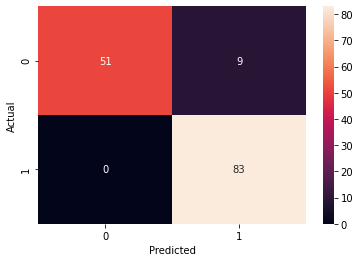

In [70]:
confusion_m = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_m, annot=True, fmt="d")

In [71]:
cm = confusion_matrix(y_test, prediction)

In [72]:
cm

array([[51,  9],
       [ 0, 83]], dtype=int64)

In [73]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [74]:
TP, TN, FP, FN

(83, 51, 9, 0)

In [75]:
recall = TP / (TP + FN)
precision = TP / (TP + FP)

In [76]:
recall, precision

(1.0, 0.9021739130434783)